# LSTM CON TARGET CONTINUA 'Close'

## Librerie

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
# -----------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

## MINUTI
### Feature: Close - Target: Close

In [2]:
# Scarica dati di Bitcoin al minuto
df = yf.download('BTC-USD', start='2024-12-28', end='2025-01-05', interval='1m')

# Controlla i dati scaricati
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Datetime                                                              
2024-12-28 00:01:00+00:00  94159.828125  94159.828125  94159.828125   
2024-12-28 00:02:00+00:00  94164.929688  94164.929688  94164.929688   
2024-12-28 00:03:00+00:00  94243.117188  94243.117188  94243.117188   
2024-12-28 00:04:00+00:00  94219.835938  94219.835938  94219.835938   
2024-12-28 00:05:00+00:00  94236.851562  94236.851562  94236.851562   

Price                               Low          Open    Volume  
Ticker                          BTC-USD       BTC-USD   BTC-USD  
Datetime                                                         
2024-12-28 00:01:00+00:00  94159.828125  94159.828125         0  
2024-12-28 00:02:00+00:00  94164.929688  94164.929688         0  
2024-12-28 00:03:00+00:00  94243.117188  94243.117188         0  
2024-12-28 00:04:00+00:00  94219.83

In [3]:
# Selezione del dataframe
df = df[['Close']]
print(df.head())

Price                             Close
Ticker                          BTC-USD
Datetime                               
2024-12-28 00:01:00+00:00  94159.828125
2024-12-28 00:02:00+00:00  94164.929688
2024-12-28 00:03:00+00:00  94243.117188
2024-12-28 00:04:00+00:00  94219.835938
2024-12-28 00:05:00+00:00  94236.851562


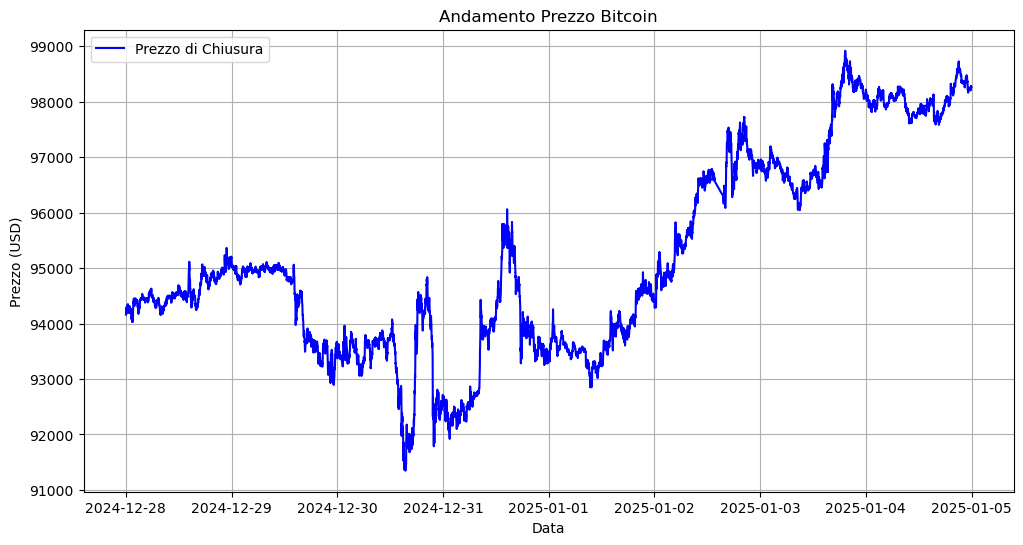

In [4]:
# Creiamo il grafico con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Prezzo di Chiusura', color='b')

# Personalizziamo il grafico
plt.title('Andamento Prezzo Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo (USD)')
plt.legend()
plt.grid(True)

# Mostriamo il grafico
plt.show()

#### Pre-processing - Modellazione - Training

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

look_back = 60  # Utilizziamo 60 giorni precedenti per prevedere il prossimo
X, Y = create_dataset(scaled_data, look_back)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [6]:
model = Sequential()
# Primo strato LSTM con return_sequences=True per impilare un altro strato LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Aggiungi dropout per prevenire overfitting
# Secondo strato LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
# Strato di output
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0135 - val_loss: 0.0015
Epoch 2/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0017 - val_loss: 4.8974e-04
Epoch 3/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0015 - val_loss: 1.4840e-04
Epoch 4/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0012 - val_loss: 3.5269e-04
Epoch 6/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0011 - val_loss: 1.0043e-04
Epoch 7/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0010 - val_loss: 2.7247e-04
Epoch 8/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 8.2580e-04 - val_loss: 2.9943e-04
Epoch 9/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 8.2292e-04 - val_loss: 9.9097e-05
Epoch 10/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 7.4704e-04 - val_loss: 9.8629e-04
Epoch 11/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 6.6896e-04 - val_loss: 3.3114e-04


#### Previsioni sul test

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSE: 7132.914684366297
Root Mean Squared Error: 84.45658461225091
Mean Absolute Percentage Error: 0.07%


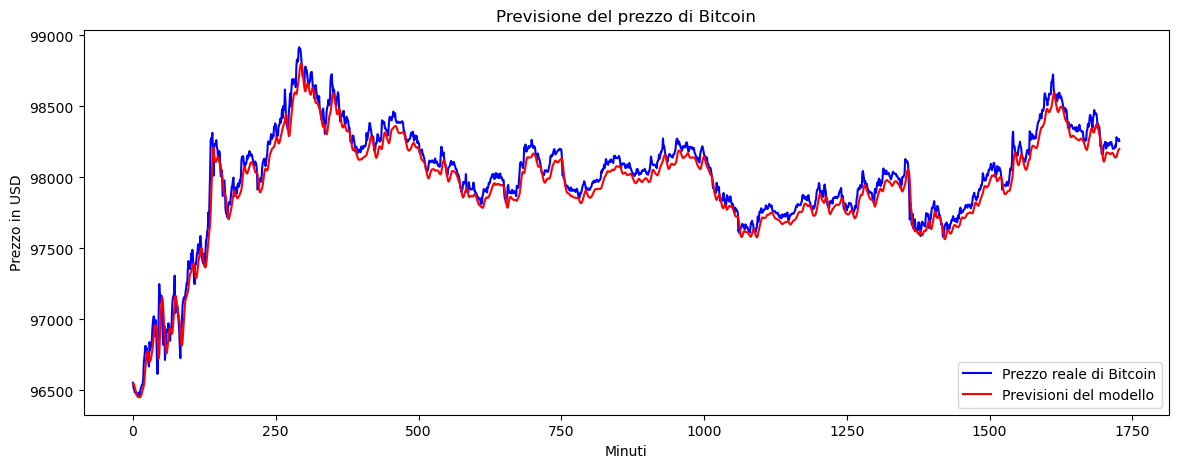

In [7]:
# Previsione sui dati di test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calcoliamo l'errore medio quadratico
mse = mean_squared_error(Y_test_actual, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mean_squared_error(Y_test_actual, predictions))
mape = mean_absolute_percentage_error(Y_test_actual, predictions) * 100
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Grafico delle previsioni vs valori reali
plt.figure(figsize=(14,5))
plt.plot(Y_test_actual, color='blue', label='Prezzo reale di Bitcoin')
plt.plot(predictions, color='red', label='Previsioni del modello')
plt.title('Previsione del prezzo di Bitcoin')
plt.xlabel('Minuti')
plt.ylabel('Prezzo in USD')
plt.legend()
plt.show()

#### Previsione su nuovi dati 

In [8]:
# 1. Scarichiamo i dati relativi a un giorno specifico
# Scarichiamo i dati
new_data = yf.download('BTC-USD', start='2025-01-05', end='2025-01-06', interval='1m')
new_data = new_data[['Close']]
print("Dati scaricati:")

# 2. Preprocessamento dei dati
# Normalizziamo i dati in base allo scaler già usato durante l'addestramento
# Assicurati di scalare tutte le colonne necessarie
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(new_data[['Close']].values)

seq_length = 60  # Assicurati che sia lo stesso valore usato durante l'addestramento del modello
# Creiamo la sequenza per l'input del modello
def create_single_sequence(data, seq_length=60):
    return np.array([data[-seq_length:]])

# Verifica se ci sono abbastanza dati per creare una sequenza
if len(scaled_features) >= seq_length:
    new_sequence = create_single_sequence(scaled_features, seq_length)
    print("Sequenza preparata per il modello (prima del reshape):", new_sequence.shape)
    
    # Aggiustiamo la forma per il modello
    new_sequence = new_sequence.reshape(1, seq_length, 1)  # Cambiato a 5 per le 5 caratteristiche
    print("Sequenza preparata per il modello (dopo il reshape):", new_sequence.shape)
else:
    print(f"Non ci sono abbastanza dati per creare una sequenza (richiesti: {seq_length}, presenti: {len(scaled_features)}).")

# 3. Predizione con il modello
if len(scaled_features) >= seq_length:
    prediction = model.predict(new_sequence)
    print("Forma della previsione:", prediction.shape)
    
    # Denormalizziamo la previsione per ottenere il valore reale
    predicted_close = scaler.inverse_transform(prediction)[0, 0]
    
    # Valore reale del `Close` del giorno successivo
    actual_close = new_data['Close'].iloc[-1]
    
    # Risultati
    print("Risultati:")
    print(f"Valore Close predetto: {predicted_close}")
    print(f"Valore Close reale: {actual_close}")
    print(f"Errore assoluto: {abs(predicted_close - actual_close)}")
else:
    print("Non è possibile effettuare una predizione con i dati disponibili.")

[*********************100%***********************]  1 of 1 completed

Dati scaricati:
Sequenza preparata per il modello (prima del reshape): (1, 60, 1)
Sequenza preparata per il modello (dopo il reshape): (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Forma della previsione: (1, 1)
Risultati:
Valore Close predetto: 96739.359375
Valore Close reale: Ticker
BTC-USD    98319.664062
Name: 2025-01-05 23:58:00+00:00, dtype: float64
Errore assoluto: Ticker
BTC-USD    1580.304688
Name: 2025-01-05 23:58:00+00:00, dtype: float64


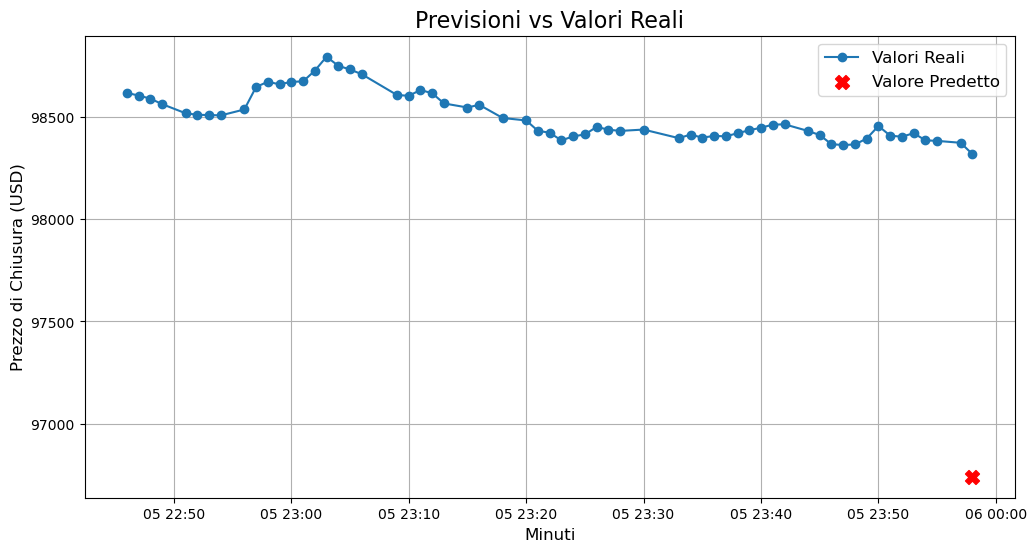

In [9]:
def plot_predictions(new_data, predicted_close, seq_length):
    """
    Visualizza un grafico per confrontare le previsioni del modello con i valori reali.
    """
    # Creiamo una lista di indici per le previsioni
    prediction_date = new_data.index[-1]  # La data della previsione
    actual_date = new_data.index[-2]     # Data del valore reale usato per confronto

    # Costruiamo il grafico
    plt.figure(figsize=(12, 6))

    # Plot dei valori reali
    plt.plot(new_data.index[-seq_length-1:], new_data['Close'][-seq_length-1:], label="Valori Reali", marker='o')

    # Aggiungiamo la previsione al grafico
    plt.scatter(prediction_date, predicted_close, color='r', label="Valore Predetto", zorder=5, marker='X', s=100)

    # Dettagli del grafico
    plt.title('Previsioni vs Valori Reali', fontsize=16)
    plt.xlabel('Minuti', fontsize=12)
    plt.ylabel('Prezzo di Chiusura (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Chiamata alla funzione con i dati disponibili
plot_predictions(new_data, predicted_close, seq_length)

In [10]:
def evaluate_predictions(real_values, predicted_values):
    """
    Calcola i parametri di valutazione delle predizioni.
    """
    # Calcolo delle metriche
    mae = mean_absolute_error(real_values, predicted_values)
    mse = mean_squared_error(real_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((real_values - predicted_values) / real_values)) * 100  # In percentuale

    # Ritorna i risultati in un dizionario
    return {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Percentage Error (MAPE)": mape
    }

real_values = np.array([new_data['Close'].iloc[-2]])  # Valore Close reale del giorno precedente
predicted_values = np.array([predicted_close])       # Valore predetto

# Calcoliamo le metriche
metrics = evaluate_predictions(real_values, predicted_values)

# Stampa delle metriche
print("Metriche di Valutazione delle Predizioni:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Metriche di Valutazione delle Predizioni:
Mean Absolute Error (MAE): 1635.59
Mean Squared Error (MSE): 2675166.92
Root Mean Squared Error (RMSE): 1635.59
Mean Absolute Percentage Error (MAPE): 1.66


### Feature: Close, Open, High, Low, Volume - Taget: Close

In [11]:
# Scarica dati di Bitcoin al minuto
df = yf.download('BTC-USD', start='2024-12-28', end='2025-01-05', interval='1m')

# Controlla i dati scaricati
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Datetime                                                              
2024-12-28 00:01:00+00:00  94159.828125  94159.828125  94159.828125   
2024-12-28 00:02:00+00:00  94164.929688  94164.929688  94164.929688   
2024-12-28 00:03:00+00:00  94243.117188  94243.117188  94243.117188   
2024-12-28 00:04:00+00:00  94219.835938  94219.835938  94219.835938   
2024-12-28 00:05:00+00:00  94236.851562  94236.851562  94236.851562   

Price                               Low          Open    Volume  
Ticker                          BTC-USD       BTC-USD   BTC-USD  
Datetime                                                         
2024-12-28 00:01:00+00:00  94159.828125  94159.828125         0  
2024-12-28 00:02:00+00:00  94164.929688  94164.929688         0  
2024-12-28 00:03:00+00:00  94243.117188  94243.117188         0  
2024-12-28 00:04:00+00:00  94219.83

In [12]:
df = df[['Close', 'Open', 'Low', 'High', 'Volume']]
print(df.head())

Price                             Close          Open           Low  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Datetime                                                              
2024-12-28 00:01:00+00:00  94159.828125  94159.828125  94159.828125   
2024-12-28 00:02:00+00:00  94164.929688  94164.929688  94164.929688   
2024-12-28 00:03:00+00:00  94243.117188  94243.117188  94243.117188   
2024-12-28 00:04:00+00:00  94219.835938  94219.835938  94219.835938   
2024-12-28 00:05:00+00:00  94236.851562  94236.851562  94236.851562   

Price                              High    Volume  
Ticker                          BTC-USD   BTC-USD  
Datetime                                           
2024-12-28 00:01:00+00:00  94159.828125         0  
2024-12-28 00:02:00+00:00  94164.929688         0  
2024-12-28 00:03:00+00:00  94243.117188         0  
2024-12-28 00:04:00+00:00  94219.835938  13680640  
2024-12-28 00:05:00+00:00  94236.851562  36200448  


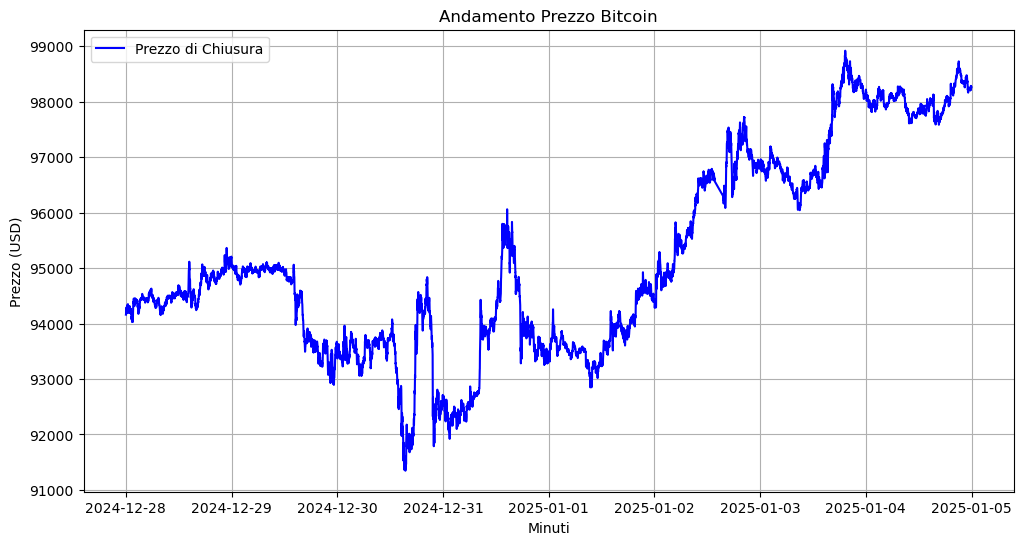

In [13]:
# Creiamo il grafico con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Prezzo di Chiusura', color='b')

# Personalizziamo il grafico
plt.title('Andamento Prezzo Bitcoin')
plt.xlabel('Minuti')
plt.ylabel('Prezzo (USD)')
plt.legend()
plt.grid(True)

# Mostriamo il grafico
plt.show()

#### Pre-processing - Modellazione - Training

In [14]:
# 3. Seleziona le features e il target includendo il Volume
features = ['Open', 'High', 'Low', 'Volume', 'Close']
target = 'Close'

data = df[features]

# 4. Scala le features utilizzando MinMaxScaler
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(data[features])

# 5. Scala il target utilizzando MinMaxScaler (Prezzo di Chiusura)
scaler_target = MinMaxScaler()
scaled_target = scaler_target.fit_transform(data[[target]])

# 6. Definisci la lunghezza della sequenza per l'input della LSTM
sequence_length = 60  # Usiamo gli ultimi 60 minuti per predire il prossimo minuto

# 7. Crea le sequenze per l'input (X) e il target (y)
X = []
y = []

for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(scaled_target[i])  # Il prezzo di chiusura al tempo i

# Converti le liste in array numpy
X = np.array(X)
y = np.array(y)

# 8. Suddividi il dataset in training set e test set (80% training, 20% test)
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [15]:
# 9. Costruisci il modello LSTM
model = Sequential()
# Primo strato LSTM con return_sequences=True per impilare un altro strato LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout per prevenire overfitting
# Secondo strato LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
# Strato di output
model.add(Dense(units=1))

# 10. Compila il modello
model.compile(optimizer='adam', loss='mean_squared_error')

# 11. Addestra il modello
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0169 - val_loss: 0.0037
Epoch 2/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0018 - val_loss: 3.0388e-04
Epoch 3/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 4/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0015 - val_loss: 5.1405e-04
Epoch 5/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0012 - val_loss: 2.7201e-04
Epoch 6/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0011 - val_loss: 4.3436e-04
Epoch 7/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0011 - val_loss: 1.6651e-04
Epoch 8/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 8.7909e-04 - val_loss: 0.0021
Epoch 9/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 8.9485e-04 - val_loss: 5.2756e-04
Epoch 10/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 7.5492e-04 - val_loss: 1.2561e-04
Epoch 11/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 7.6669e-04 - val_loss: 1.82

#### Previsione sul test

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSE: 3481.1296657632897
Root Mean Squared Error: 59.001098852167914
Mean Absolute Percentage Error: 0.04%


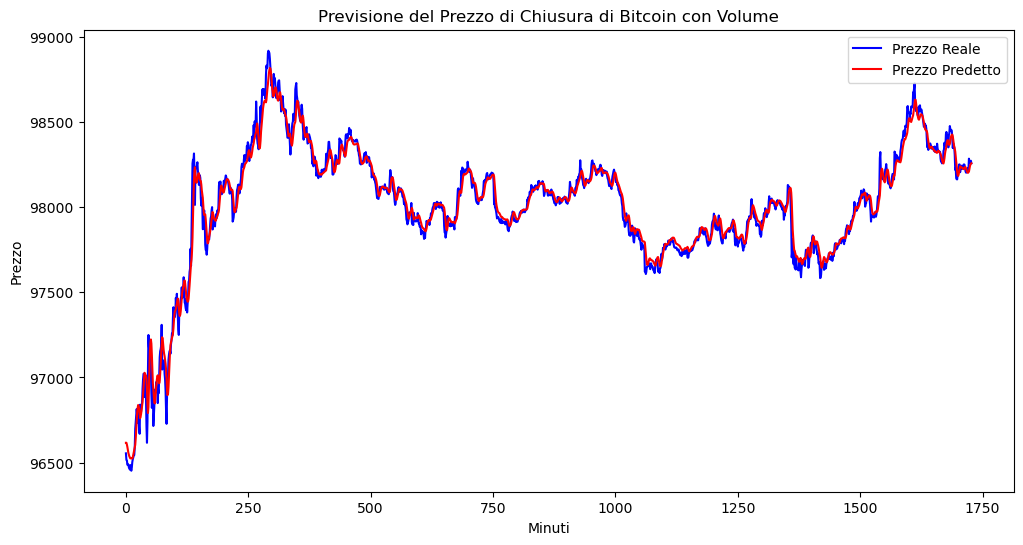

In [16]:
# 12. Effettua previsioni sul test set
predictions = model.predict(X_test)

# 13. Inversa la trasformazione per ottenere i valori originali
predictions_inversed = scaler_target.inverse_transform(predictions)
y_test_inversed = scaler_target.inverse_transform(y_test)

# 14. Valuta le performance del modello
mse = mean_squared_error(y_test_inversed, predictions_inversed)
print(f'MSE: {mse}')
rmse = np.sqrt(mean_squared_error(y_test_inversed, predictions_inversed))
mape = mean_absolute_percentage_error(y_test_inversed, predictions_inversed) * 100
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# 15. Visualizza i risultati
plt.figure(figsize=(12,6))
plt.plot(y_test_inversed, color='blue', label='Prezzo Reale')
plt.plot(predictions_inversed, color='red', label='Prezzo Predetto')
plt.title('Previsione del Prezzo di Chiusura di Bitcoin con Volume')
plt.xlabel('Minuti')
plt.ylabel('Prezzo')
plt.legend()
plt.show()

#### Previsione su nuovi dati

In [17]:
# 1. Scarichiamo i dati 
new_data = yf.download('BTC-USD', start='2025-01-05', end='2025-01-06', interval='1m')
print("Dati scaricati:")

# 2. Preprocessamento dei dati
# Normalizziamo i dati in base allo scaler già usato durante l'addestramento
# Assicurati di scalare tutte le colonne necessarie
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(new_data[['Open', 'High', 'Low', 'Volume', 'Close']].values)

seq_length = 60  # Assicurati che sia lo stesso valore usato durante l'addestramento del modello
# Creiamo la sequenza per l'input del modello
def create_single_sequence(data, seq_length=60):
    return np.array([data[-seq_length:]])

# Verifica se ci sono abbastanza dati per creare una sequenza
if len(scaled_features) >= seq_length:
    new_sequence = create_single_sequence(scaled_features, seq_length)
    print("Sequenza preparata per il modello (prima del reshape):", new_sequence.shape)
    
    # Aggiustiamo la forma per il modello
    new_sequence = new_sequence.reshape(1, seq_length, 5)  # Cambiato a 5 per le 5 caratteristiche
    print("Sequenza preparata per il modello (dopo il reshape):", new_sequence.shape)
else:
    print(f"Non ci sono abbastanza dati per creare una sequenza (richiesti: {seq_length}, presenti: {len(scaled_features)}).")

# 3. Predizione con il modello
if len(scaled_features) >= seq_length:
    prediction = model.predict(new_sequence)
    print("Forma della previsione:", prediction.shape)
    
    # Denormalizziamo la previsione per ottenere il valore reale
    predicted_close = scaler.inverse_transform(prediction)[0, 0]
    
    # Valore reale del `Close` del giorno successivo
    actual_close = new_data['Close'].iloc[-1]
    
    # Risultati
    print("Risultati:")
    print(f"Valore Close predetto: {predicted_close}")
    print(f"Valore Close reale: {actual_close}")
    print(f"Errore assoluto: {abs(predicted_close - actual_close)}")
else:
    print("Non è possibile effettuare una predizione con i dati disponibili.")

[*********************100%***********************]  1 of 1 completed

Dati scaricati:
Sequenza preparata per il modello (prima del reshape): (1, 60, 5)
Sequenza preparata per il modello (dopo il reshape): (1, 60, 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Forma della previsione: (1, 1)
Risultati:
Valore Close predetto: 96792.4453125
Valore Close reale: Ticker
BTC-USD    98319.664062
Name: 2025-01-05 23:58:00+00:00, dtype: float64
Errore assoluto: Ticker
BTC-USD    1527.21875
Name: 2025-01-05 23:58:00+00:00, dtype: float64


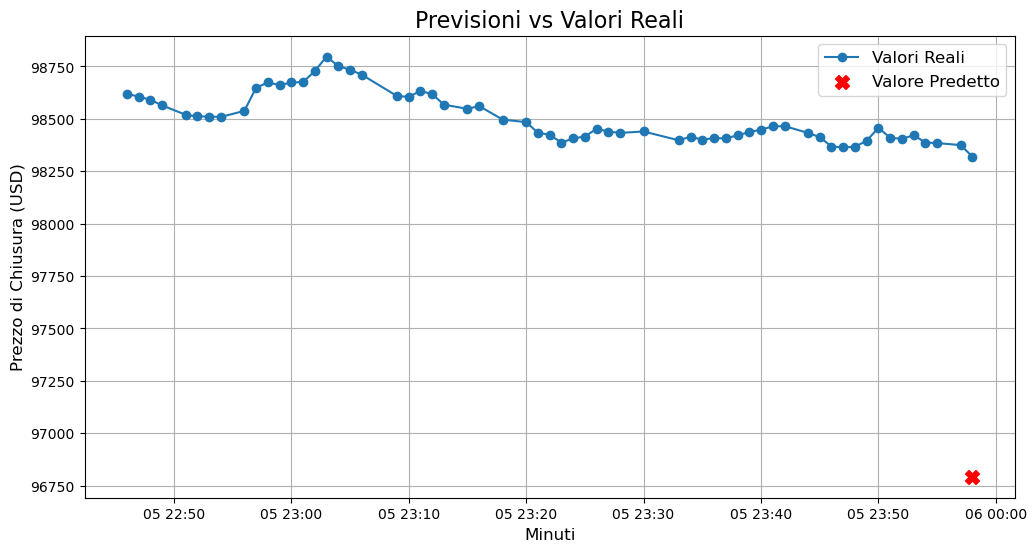

In [18]:
def plot_predictions(new_data, predicted_close, seq_length):
    """
    Visualizza un grafico per confrontare le previsioni del modello con i valori reali.
    """
    # Creiamo una lista di indici per le previsioni
    prediction_date = new_data.index[-1]  # La data della previsione
    actual_date = new_data.index[-2]     # Data del valore reale usato per confronto

    # Costruiamo il grafico
    plt.figure(figsize=(12, 6))

    # Plot dei valori reali
    plt.plot(new_data.index[-seq_length-1:], new_data['Close'][-seq_length-1:], label="Valori Reali", marker='o')

    # Aggiungiamo la previsione al grafico
    plt.scatter(prediction_date, predicted_close, color='r', label="Valore Predetto", zorder=5, marker='X', s=100)

    # Dettagli del grafico
    plt.title('Previsioni vs Valori Reali', fontsize=16)
    plt.xlabel('Minuti', fontsize=12)
    plt.ylabel('Prezzo di Chiusura (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Chiamata alla funzione con i dati disponibili
plot_predictions(new_data, predicted_close, seq_length)

In [19]:
def evaluate_predictions(real_values, predicted_values):
    """
    Calcola i parametri di valutazione delle predizioni.
    """
    # Calcolo delle metriche
    mae = mean_absolute_error(real_values, predicted_values)
    mse = mean_squared_error(real_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((real_values - predicted_values) / real_values)) * 100  # In percentuale

    # Ritorna i risultati in un dizionario
    return {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Percentage Error (MAPE)": mape
    }

real_values = np.array([new_data['Close'].iloc[-2]])  # Valore Close reale del giorno precedente
predicted_values = np.array([predicted_close])       # Valore predetto

# Calcoliamo le metriche
metrics = evaluate_predictions(real_values, predicted_values)

# Stampa delle metriche
print("Metriche di Valutazione delle Predizioni:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Metriche di Valutazione delle Predizioni:
Mean Absolute Error (MAE): 1582.51
Mean Squared Error (MSE): 2504330.98
Root Mean Squared Error (RMSE): 1582.51
Mean Absolute Percentage Error (MAPE): 1.61


## GIORNI
### Feature: Close - Target: Close

In [20]:
# 1. Scarica i dati storici di Bitcoin con intervallo di 1 minuto per gli ultimi 7 giorni
df = yf.download(tickers='BTC-USD', start='2017-01-01', end='2024-11-30')
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High          Low  \
Ticker                         BTC-USD      BTC-USD      BTC-USD      BTC-USD   
Date                                                                            
2017-01-01 00:00:00+00:00   998.325012   998.325012  1003.080017   958.698975   
2017-01-02 00:00:00+00:00  1021.750000  1021.750000  1031.390015   996.702026   
2017-01-03 00:00:00+00:00  1043.839966  1043.839966  1044.079956  1021.599976   
2017-01-04 00:00:00+00:00  1154.729980  1154.729980  1159.420044  1044.400024   
2017-01-05 00:00:00+00:00  1013.380005  1013.380005  1191.099976   910.416992   

Price                             Open     Volume  
Ticker                         BTC-USD    BTC-USD  
Date                                               
2017-01-01 00:00:00+00:00   963.658020  147775008  
2017-01-02 00:00:00+00:00   998.617004  222184992  
2017-01-03 00:00:00+00:00  1021.599976  185168000  
2017-01-04 00:00:00+00:00  1044.400024 

In [21]:
# Selezione del dataframe
df = df[['Close']]
print(df.head())

Price                            Close
Ticker                         BTC-USD
Date                                  
2017-01-01 00:00:00+00:00   998.325012
2017-01-02 00:00:00+00:00  1021.750000
2017-01-03 00:00:00+00:00  1043.839966
2017-01-04 00:00:00+00:00  1154.729980
2017-01-05 00:00:00+00:00  1013.380005


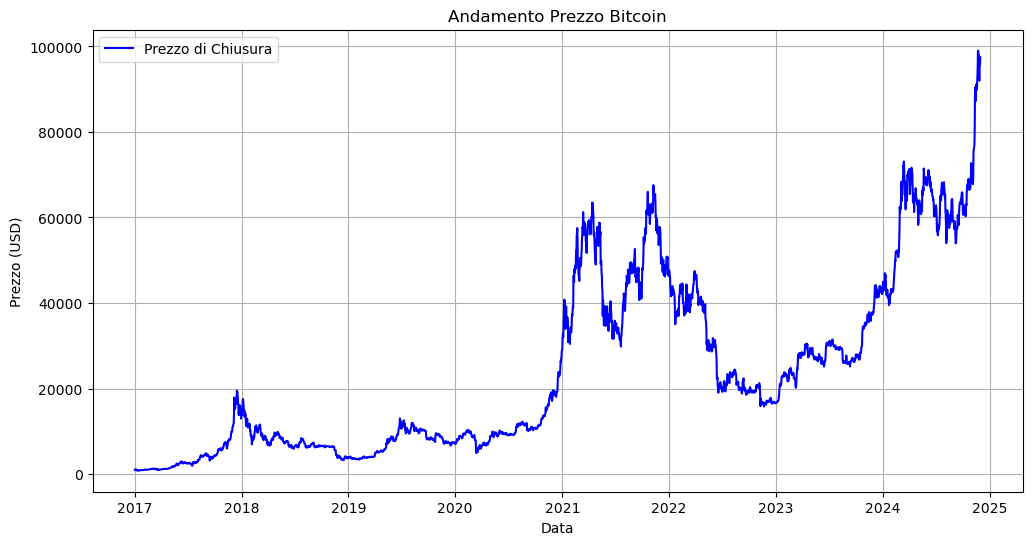

In [22]:
# Creiamo il grafico con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Prezzo di Chiusura', color='b')

# Personalizziamo il grafico
plt.title('Andamento Prezzo Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo (USD)')
plt.legend()
plt.grid(True)

# Mostriamo il grafico
plt.show()

#### Pre-processing - Modellazione - Training

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

look_back = 60  # Utilizziamo 60 giorni precedenti per prevedere il prossimo
X, Y = create_dataset(scaled_data, look_back)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
model = Sequential()
# Primo strato LSTM con return_sequences=True per impilare un altro strato LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout per prevenire overfitting
# Secondo strato LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
# Strato di output
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0099 - val_loss: 0.0015
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.1366e-04 - val_loss: 0.0017
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.6631e-04 - val_loss: 0.0016
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.8980e-04 - val_loss: 0.0011
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.2626e-04 - val_loss: 0.0025
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.9917e-04 - val_loss: 9.8798e-04
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.8157e-04 - val_loss: 9.7984e-04
Epoch 10/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.6092e-04 - val_loss: 7.8669e-04
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.3624e-04 - val_loss: 8.5248e-04
Epoch 12/20
71/71 ━━━━━━━━

#### Previsioni sul test

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 5851153.278312144
Root Mean Squared Error: 2418.9157236894685
Mean Absolute Percentage Error: 4.15%


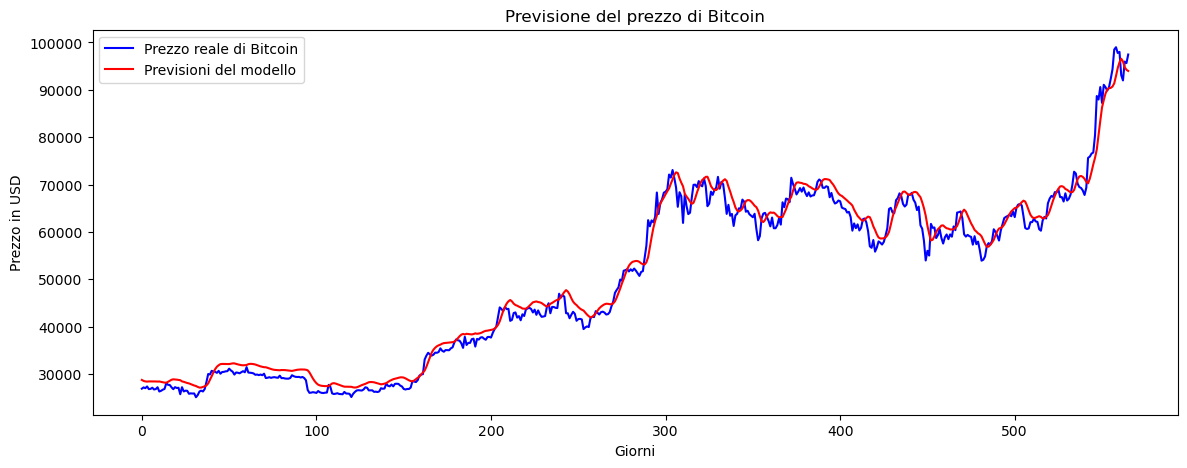

In [25]:
# Previsione sui dati di test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calcoliamo l'errore medio quadratico
mse = mean_squared_error(Y_test_actual, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mean_squared_error(Y_test_actual, predictions))
mape = mean_absolute_percentage_error(Y_test_actual, predictions) * 100
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Grafico delle previsioni vs valori reali
plt.figure(figsize=(14,5))
plt.plot(Y_test_actual, color='blue', label='Prezzo reale di Bitcoin')
plt.plot(predictions, color='red', label='Previsioni del modello')
plt.title('Previsione del prezzo di Bitcoin')
plt.xlabel('Giorni')
plt.ylabel('Prezzo in USD')
plt.legend()
plt.show()

#### Previsione su nuovi dati

In [26]:
# 1. Scarichiamo i dati 
new_data = yf.download('BTC-USD', start="2024-10-30", end="2024-12-31")
new_data = new_data[['Close']]
print("Dati scaricati:")

# 2. Preprocessamento dei dati
# Normalizziamo i dati in base allo scaler già usato durante l'addestramento
# Assicurati di scalare tutte le colonne necessarie
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(new_data[['Close']].values)

seq_length = 60  # Assicurati che sia lo stesso valore usato durante l'addestramento del modello
# Creiamo la sequenza per l'input del modello
def create_single_sequence(data, seq_length=60):
    return np.array([data[-seq_length:]])

# Verifica se ci sono abbastanza dati per creare una sequenza
if len(scaled_features) >= seq_length:
    new_sequence = create_single_sequence(scaled_features, seq_length)
    print("Sequenza preparata per il modello (prima del reshape):", new_sequence.shape)
    
    # Aggiustiamo la forma per il modello
    new_sequence = new_sequence.reshape(1, seq_length, 1)  # Cambiato a 5 per le 5 caratteristiche
    print("Sequenza preparata per il modello (dopo il reshape):", new_sequence.shape)
else:
    print(f"Non ci sono abbastanza dati per creare una sequenza (richiesti: {seq_length}, presenti: {len(scaled_features)}).")

# 3. Predizione con il modello
if len(scaled_features) >= seq_length:
    prediction = model.predict(new_sequence)
    print("Forma della previsione:", prediction.shape)
    
    # Denormalizziamo la previsione per ottenere il valore reale
    predicted_close = scaler.inverse_transform(prediction)[0, 0]
    
    # Valore reale del `Close` del giorno successivo
    actual_close = new_data['Close'].iloc[-1]
    
    # Risultati
    print("Risultati:")
    print(f"Valore Close predetto: {predicted_close}")
    print(f"Valore Close reale: {actual_close}")
    print(f"Errore assoluto: {abs(predicted_close - actual_close)}")
else:
    print("Non è possibile effettuare una predizione con i dati disponibili.")

[*********************100%***********************]  1 of 1 completed

Dati scaricati:
Sequenza preparata per il modello (prima del reshape): (1, 60, 1)
Sequenza preparata per il modello (dopo il reshape): (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Forma della previsione: (1, 1)
Risultati:
Valore Close predetto: 70118.7890625
Valore Close reale: Ticker
BTC-USD    92643.210938
Name: 2024-12-30 00:00:00+00:00, dtype: float64
Errore assoluto: Ticker
BTC-USD    22524.421875
Name: 2024-12-30 00:00:00+00:00, dtype: float64


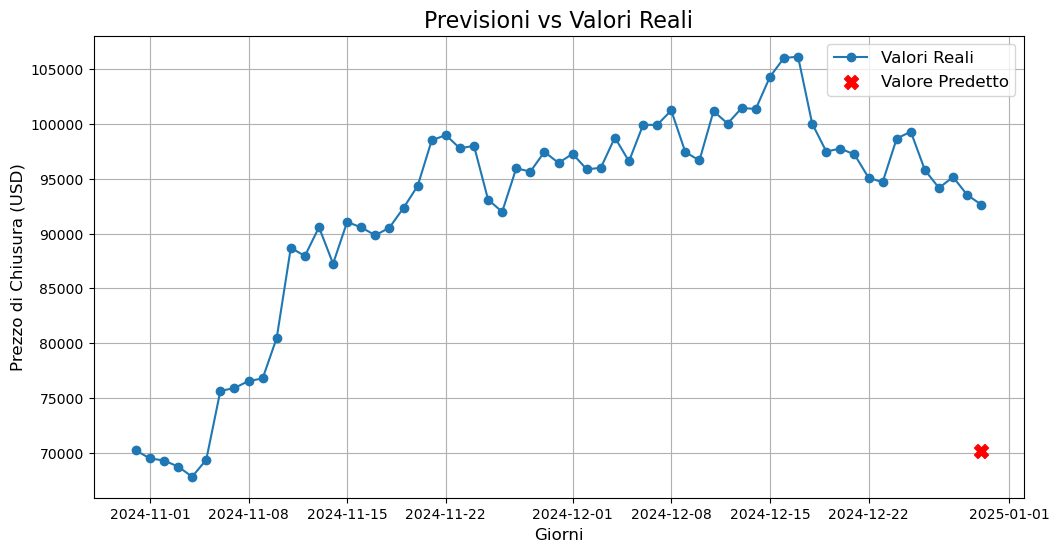

In [27]:
def plot_predictions(new_data, predicted_close, seq_length):
    """
    Visualizza un grafico per confrontare le previsioni del modello con i valori reali.
    """
    # Creiamo una lista di indici per le previsioni
    prediction_date = new_data.index[-1]  # La data della previsione
    actual_date = new_data.index[-2]     # Data del valore reale usato per confronto

    # Costruiamo il grafico
    plt.figure(figsize=(12, 6))

    # Plot dei valori reali
    plt.plot(new_data.index[-seq_length-1:], new_data['Close'][-seq_length-1:], label="Valori Reali", marker='o')

    # Aggiungiamo la previsione al grafico
    plt.scatter(prediction_date, predicted_close, color='r', label="Valore Predetto", zorder=5, marker='X', s=100)

    # Dettagli del grafico
    plt.title('Previsioni vs Valori Reali', fontsize=16)
    plt.xlabel('Giorni', fontsize=12)
    plt.ylabel('Prezzo di Chiusura (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Chiamata alla funzione con i dati disponibili
plot_predictions(new_data, predicted_close, seq_length)

In [28]:
def evaluate_predictions(real_values, predicted_values):
    """
    Calcola i parametri di valutazione delle predizioni.
    """
    # Calcolo delle metriche
    mae = mean_absolute_error(real_values, predicted_values)
    mse = mean_squared_error(real_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((real_values - predicted_values) / real_values)) * 100  # In percentuale

    # Ritorna i risultati in un dizionario
    return {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Percentage Error (MAPE)": mape
    }

real_values = np.array([new_data['Close'].iloc[-2]])  # Valore Close reale del giorno precedente
predicted_values = np.array([predicted_close])       # Valore predetto

# Calcoliamo le metriche
metrics = evaluate_predictions(real_values, predicted_values)

# Stampa delle metriche
print("Metriche di Valutazione delle Predizioni:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Metriche di Valutazione delle Predizioni:
Mean Absolute Error (MAE): 23411.44
Mean Squared Error (MSE): 548095405.82
Root Mean Squared Error (RMSE): 23411.44
Mean Absolute Percentage Error (MAPE): 25.03


### Feature: Close, Open, High, Low, Volume - Target: Close

In [29]:
# 1. Scarica i dati storici di Bitcoin con intervallo di 1 minuto per gli ultimi 7 giorni
df = yf.download(tickers='BTC-USD', start='2017-01-01', end='2024-11-30')
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High          Low  \
Ticker                         BTC-USD      BTC-USD      BTC-USD      BTC-USD   
Date                                                                            
2017-01-01 00:00:00+00:00   998.325012   998.325012  1003.080017   958.698975   
2017-01-02 00:00:00+00:00  1021.750000  1021.750000  1031.390015   996.702026   
2017-01-03 00:00:00+00:00  1043.839966  1043.839966  1044.079956  1021.599976   
2017-01-04 00:00:00+00:00  1154.729980  1154.729980  1159.420044  1044.400024   
2017-01-05 00:00:00+00:00  1013.380005  1013.380005  1191.099976   910.416992   

Price                             Open     Volume  
Ticker                         BTC-USD    BTC-USD  
Date                                               
2017-01-01 00:00:00+00:00   963.658020  147775008  
2017-01-02 00:00:00+00:00   998.617004  222184992  
2017-01-03 00:00:00+00:00  1021.599976  185168000  
2017-01-04 00:00:00+00:00  1044.400024 

In [30]:
df = df[['Close', 'Open', 'Low', 'High', 'Volume']]
print(df.head())

Price                            Close         Open          Low         High  \
Ticker                         BTC-USD      BTC-USD      BTC-USD      BTC-USD   
Date                                                                            
2017-01-01 00:00:00+00:00   998.325012   963.658020   958.698975  1003.080017   
2017-01-02 00:00:00+00:00  1021.750000   998.617004   996.702026  1031.390015   
2017-01-03 00:00:00+00:00  1043.839966  1021.599976  1021.599976  1044.079956   
2017-01-04 00:00:00+00:00  1154.729980  1044.400024  1044.400024  1159.420044   
2017-01-05 00:00:00+00:00  1013.380005  1156.729980   910.416992  1191.099976   

Price                         Volume  
Ticker                       BTC-USD  
Date                                  
2017-01-01 00:00:00+00:00  147775008  
2017-01-02 00:00:00+00:00  222184992  
2017-01-03 00:00:00+00:00  185168000  
2017-01-04 00:00:00+00:00  344945984  
2017-01-05 00:00:00+00:00  510199008  


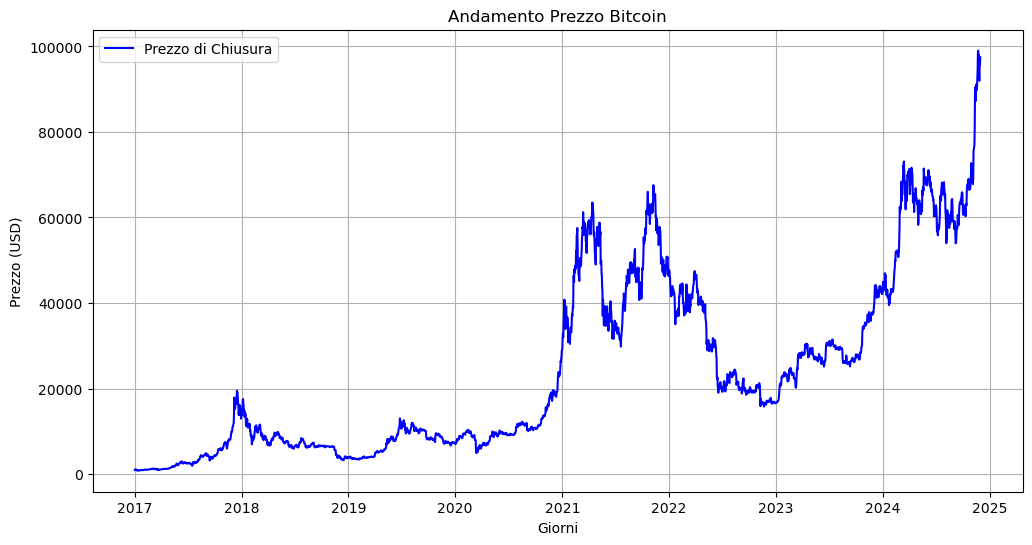

In [31]:
# Creiamo il grafico con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Prezzo di Chiusura', color='b')

# Personalizziamo il grafico
plt.title('Andamento Prezzo Bitcoin')
plt.xlabel('Giorni')
plt.ylabel('Prezzo (USD)')
plt.legend()
plt.grid(True)

# Mostriamo il grafico
plt.show()

#### Pre-processing - Modellazione - Training

In [32]:
# 3. Seleziona le features e il target includendo il Volume
features = ['Open', 'High', 'Low', 'Volume', 'Close']
target = 'Close'

data = df[features]

# 4. Scala le features utilizzando MinMaxScaler
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(data[features])

# 5. Scala il target utilizzando MinMaxScaler (Prezzo di Chiusura)
scaler_target = MinMaxScaler()
scaled_target = scaler_target.fit_transform(data[[target]])

# 6. Definisci la lunghezza della sequenza per l'input della LSTM
sequence_length = 60  # Usiamo gli ultimi 60 giorni per predire il prossimo minuto

# 7. Crea le sequenze per l'input (X) e il target (y)
X = []
y = []

for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(scaled_target[i])  # Il prezzo di chiusura al tempo i

# Converti le liste in array numpy
X = np.array(X)
y = np.array(y)

# 8. Suddividi il dataset in training set e test set (80% training, 20% test)
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [33]:
# 9. Modello LSTM
model = Sequential()
# Primo strato LSTM con return_sequences=True per impilare un altro strato LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout per prevenire overfitting
# Secondo strato LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
# Strato di output
model.add(Dense(units=1))

# 10. Compila il modello
model.compile(optimizer='adam', loss='mean_squared_error')

# 11. Addestra il modello
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0320 - val_loss: 0.0020
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0017 - val_loss: 0.0050
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.7855e-04 - val_loss: 0.0011
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.3888e-04 - val_loss: 0.0020
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.0950e-04 - val_loss: 0.0014
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.

#### Previsione sul test

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 19981512.143715695
Root Mean Squared Error: 4470.06847192699
Mean Absolute Percentage Error: 5.81%


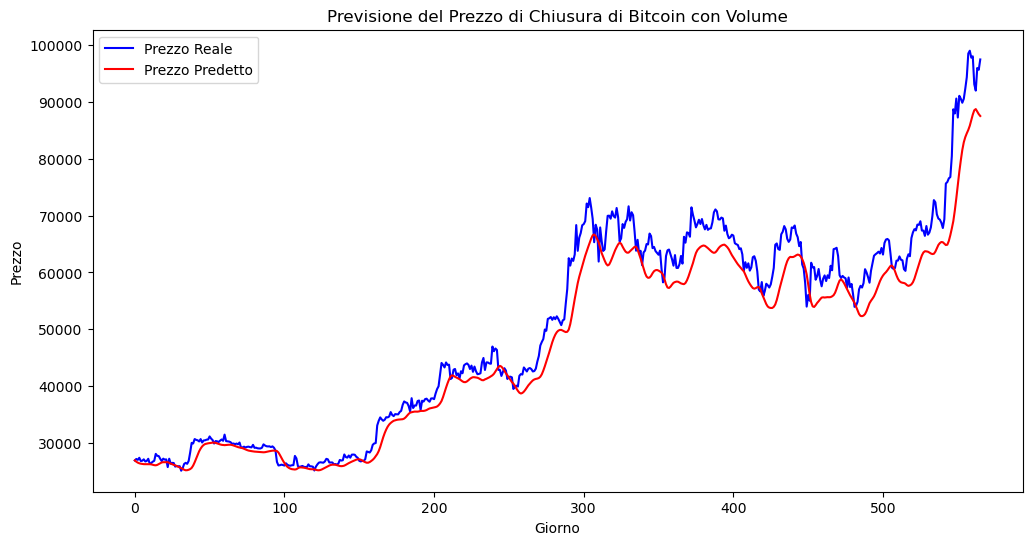

In [34]:
# 12. Effettua previsioni sul test set
predictions = model.predict(X_test)

# 13. Inversa la trasformazione per ottenere i valori originali
predictions_inversed = scaler_target.inverse_transform(predictions)
y_test_inversed = scaler_target.inverse_transform(y_test)

# 14. Valuta le performance del modello
mse = mean_squared_error(y_test_inversed, predictions_inversed)
print(f'MSE: {mse}')
rmse = np.sqrt(mean_squared_error(y_test_inversed, predictions_inversed))
mape = mean_absolute_percentage_error(y_test_inversed, predictions_inversed) * 100
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# 15. Visualizza i risultati
plt.figure(figsize=(12,6))
plt.plot(y_test_inversed, color='blue', label='Prezzo Reale')
plt.plot(predictions_inversed, color='red', label='Prezzo Predetto')
plt.title('Previsione del Prezzo di Chiusura di Bitcoin con Volume')
plt.xlabel('Giorno')
plt.ylabel('Prezzo')
plt.legend()
plt.show()

#### Previsione su nuovi dati

In [35]:
# 1. Scarichiamo i dati 
new_data = yf.download('BTC-USD', start="2024-10-30", end="2024-12-31")
print("Dati scaricati:")

# 2. Preprocessamento dei dati
# Normalizziamo i dati in base allo scaler già usato durante l'addestramento
# Assicurati di scalare tutte le colonne necessarie
scaler_features = MinMaxScaler()
scaled_features = scaler_features.fit_transform(new_data[['Open', 'High', 'Low', 'Volume', 'Close']].values)

seq_length = 60  # Assicurati che sia lo stesso valore usato durante l'addestramento del modello
# Creiamo la sequenza per l'input del modello
def create_single_sequence(data, seq_length=60):
    return np.array([data[-seq_length:]])

# Verifica se ci sono abbastanza dati per creare una sequenza
if len(scaled_features) >= seq_length:
    new_sequence = create_single_sequence(scaled_features, seq_length)
    print("Sequenza preparata per il modello (prima del reshape):", new_sequence.shape)
    
    # Aggiustiamo la forma per il modello
    new_sequence = new_sequence.reshape(1, seq_length, 5)  # Cambiato a 5 per le 5 caratteristiche
    print("Sequenza preparata per il modello (dopo il reshape):", new_sequence.shape)
else:
    print(f"Non ci sono abbastanza dati per creare una sequenza (richiesti: {seq_length}, presenti: {len(scaled_features)}).")

# 3. Predizione con il modello
if len(scaled_features) >= seq_length:
    prediction = model.predict(new_sequence)
    print("Forma della previsione:", prediction.shape)
    
    # Denormalizziamo la previsione per ottenere il valore reale
    predicted_close = scaler.inverse_transform(prediction)[0, 0]
    
    # Valore reale del `Close` del giorno successivo
    actual_close = new_data['Close'].iloc[-1]
    
    # Risultati
    print("Risultati:")
    print(f"Valore Close predetto: {predicted_close}")
    print(f"Valore Close reale: {actual_close}")
    print(f"Errore assoluto: {abs(predicted_close - actual_close)}")
else:
    print("Non è possibile effettuare una predizione con i dati disponibili.")

[*********************100%***********************]  1 of 1 completed

Dati scaricati:
Sequenza preparata per il modello (prima del reshape): (1, 60, 5)
Sequenza preparata per il modello (dopo il reshape): (1, 60, 5)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Forma della previsione: (1, 1)
Risultati:
Valore Close predetto: 65573.609375
Valore Close reale: Ticker
BTC-USD    92643.210938
Name: 2024-12-30 00:00:00+00:00, dtype: float64
Errore assoluto: Ticker
BTC-USD    27069.601562
Name: 2024-12-30 00:00:00+00:00, dtype: float64


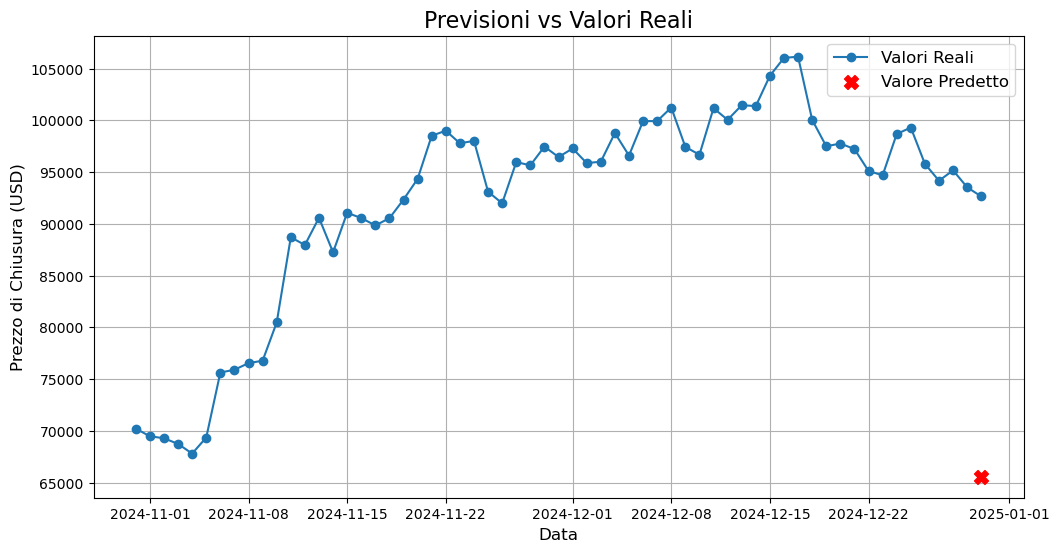

In [36]:
def plot_predictions(new_data, predicted_close, seq_length):
    """
    Visualizza un grafico per confrontare le previsioni del modello con i valori reali.
    """
    # Creiamo una lista di indici per le previsioni
    prediction_date = new_data.index[-1]  # La data della previsione
    actual_date = new_data.index[-2]     # Data del valore reale usato per confronto

    # Costruiamo il grafico
    plt.figure(figsize=(12, 6))

    # Plot dei valori reali
    plt.plot(new_data.index[-seq_length-1:], new_data['Close'][-seq_length-1:], label="Valori Reali", marker='o')

    # Aggiungiamo la previsione al grafico
    plt.scatter(prediction_date, predicted_close, color='r', label="Valore Predetto", zorder=5, marker='X', s=100)

    # Dettagli del grafico
    plt.title('Previsioni vs Valori Reali', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Prezzo di Chiusura (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Chiamata alla funzione con i dati disponibili
plot_predictions(new_data, predicted_close, seq_length)

In [37]:
def evaluate_predictions(real_values, predicted_values):
    """
    Calcola i parametri di valutazione delle predizioni.
    """
    # Calcolo delle metriche
    mae = mean_absolute_error(real_values, predicted_values)
    mse = mean_squared_error(real_values, predicted_values)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((real_values - predicted_values) / real_values)) * 100  # In percentuale

    # Ritorna i risultati in un dizionario
    return {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Percentage Error (MAPE)": mape
    }

real_values = np.array([new_data['Close'].iloc[-2]])  # Valore Close reale del giorno precedente
predicted_values = np.array([predicted_close])       # Valore predetto

# Calcoliamo le metriche
metrics = evaluate_predictions(real_values, predicted_values)

# Stampa delle metriche
print("Metriche di Valutazione delle Predizioni:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Metriche di Valutazione delle Predizioni:
Mean Absolute Error (MAE): 27956.62
Mean Squared Error (MSE): 781572444.57
Root Mean Squared Error (RMSE): 27956.62
Mean Absolute Percentage Error (MAPE): 29.89
